Text(0, 0.5, 'Age')

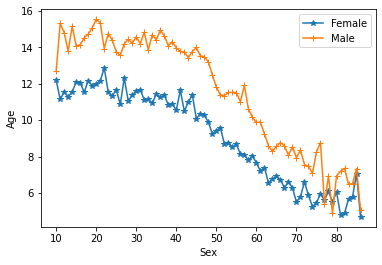

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
# Loading the data
data1 = "https://gist.githubusercontent.com/mbonsma/8da0990b71ba9a09f7de395574e54df1/raw/aec88b30af87fad8d45da7e774223f91dad09e88/lh_data.csv"
lefthand_data = pd.read_csv(data1)

# Male and Female left-handedness rates vs. age
%matplotlib inline
fig, ax = plt.subplots() # To create figure and axis objects
ax.plot('Age','Female',data=lefthand_data,marker='*') # "Female" vs. "Age"
ax.plot('Age','Male',data=lefthand_data,marker='+') # "Male" vs. "Age"
ax.legend() 
ax.set_xlabel('Sex')
ax.set_ylabel('Age')

Text(0, 0.5, 'Mean_lh')

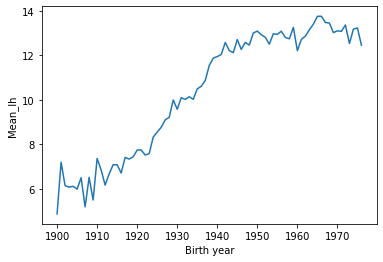

In [2]:
# New column for birth year of each age
lefthand_data['Birth year'] = 1986 - lefthand_data['Age']
# New column for the average of male and female
lefthand_data['Mean_lh'] = lefthand_data[['Male','Female']].mean(axis=1)
# Plot of the 'Mean_lh' column vs. 'Birth year'
fig, ax = plt.subplots()
ax.plot('Birth year','Mean_lh',data = lefthand_data) # 'Mean_lh' vs 'Birth year'
ax.set_xlabel('Birth year') # setting x-axis label
ax.set_ylabel('Mean_lh') # setting y-axis label

In [3]:
import numpy as np
# Creating function for P(LH | A)
def P_lh_A(age_of_death,study_year = 1990): 
    # Use the mean of the 10 last and 10 first points for left-handedness rates before and after the start 
    early_1900s_rate = lefthand_data['Mean_lh'][-10:].mean() 
    late_1900s_rate = lefthand_data['Mean_lh'][:10].mean()
    middle_rate = lefthand_data.loc[lefthand_data['Birth year'].isin(study_year-age_of_death)]['Mean_lh']
    youngest_age = study_year-1986+10  # youngest age is 10
    oldest_age = study_year-1986+86  # oldest age is 86
    
    P_rtrn = np.zeros(age_of_death.shape) # creating an empty array to store results
    # extract rate of left-handedness for people of ages 'ages_of_death'
    P_rtrn[age_of_death > oldest_age] = early_1900s_rate / 100
    P_rtrn[age_of_death < youngest_age] = late_1900s_rate / 100
    P_rtrn[np.logical_and((age_of_death <= oldest_age),(age_of_death >= youngest_age))] = middle_rate / 100
    
    return P_rtrn

Text(0, 0.5, 'Male and Female')

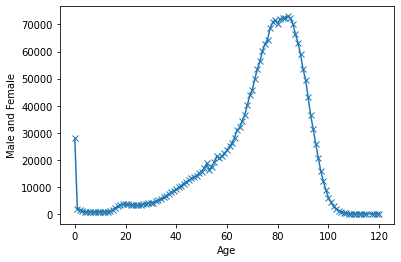

In [4]:
# Death distribution data in 1999
data2 = "https://gist.githubusercontent.com/mbonsma/2f4076aab6820ca1807f4e29f75f18ec/raw/62f3ec07514c7e31f5979beeca86f19991540796/cdc_vs00199_table310.tsv"
# load death distribution data
death_distribution_data = pd.read_csv(data2,sep='\t',skiprows=[1])
# drop NaN values from the both male and female columns
death_distribution_data = death_distribution_data.dropna(subset=['Both Sexes'])
# Plot no.of people who died w.r.t age
fig,ax = plt.subplots()
ax.plot('Age','Both Sexes',data = death_distribution_data,marker='x') # 'Both Sexes' vs 'Age'
ax.set_xlabel('Age') 
ax.set_ylabel('Male and Female')

In [5]:
# Overall probability of left-handedness
def P_lh(death_distribution_data, study_year = 1990): # sum over P_lh for each age group
    p_list = death_distribution_data['Both Sexes'] * P_lh_A(death_distribution_data['Age'], study_year) # multiply no.of dead people by P_lh_A
    p = np.sum(p_list) # calculate the sum of p_list
    return p / np.sum(death_distribution_data['Both Sexes']) # normalize to total no.of people(sum of death_distribution_data['Both Sexes'])
print(P_lh(death_distribution_data))

0.07766387615350638


In [6]:
# Overall probability being particular 'age_of_death' given left-handed
def P_A_lh(age_of_death, death_distribution_data, study_year = 1990):
    P_A = death_distribution_data['Both Sexes'][age_of_death]/np.sum(death_distribution_data['Both Sexes'])
    P_left = P_lh(death_distribution_data, study_year) # P_lh function to get probability of left-handedness overall
    P_lh_A1 = P_lh_A(age_of_death, study_year) # P_lh_A to get probability of left-handedness for a certain age
    return P_lh_A1*P_A/P_left

In [7]:
# Overall probability being particular 'age_of_death' given right-handed
def P_A_rh(age_of_death, death_distribution_data, study_year = 1990):
    P_A = death_distribution_data['Both Sexes'][age_of_death]/np.sum(death_distribution_data['Both Sexes'])
    P_right = 1 - P_lh(death_distribution_data, study_year) # either left-handed or right-handed, so P_right = 1 - P_left
    P_rh_A = 1 - P_lh_A(age_of_death, study_year) # P_rh_A = 1 - P_lh_A 
    return P_rh_A*P_A/P_right

Text(0, 0.5, 'Probability of being age A at death')

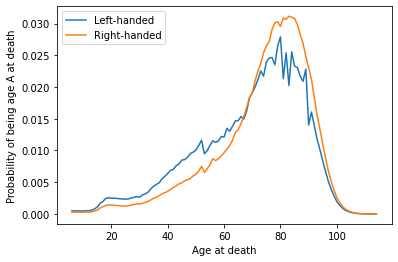

In [8]:
ages = np.arange(6,115,1) 
# calculate the probability of being left- or right-handed for each 
left_handed_probability = P_A_lh(ages, death_distribution_data)
right_handed_probability = P_A_rh(ages, death_distribution_data)

# create a plot of the two probabilities vs age
fig,ax = plt.subplots() 
ax.plot(ages,left_handed_probability,label = "Left-handed")
ax.plot(ages,right_handed_probability,label = "Right-handed")
ax.legend()
ax.set_xlabel("Age at death")
ax.set_ylabel(r"Probability of being age A at death")

In [9]:
# Average ages for left-handers and right-handers at death
avg_lh_age =  np.nansum(ages*np.array(left_handed_probability))
avg_rh_age =  np.nansum(ages*np.array(right_handed_probability))

# Average age for each group
print("Average age of lefthanded " +str(avg_lh_age))
print("Average age of righthanded " +str(avg_rh_age))

# Difference between the average ages
print("The difference in average ages is " +str(round(avg_rh_age-avg_lh_age,1))+" years.")

Average age of lefthanded 67.24503662801027
Average age of righthanded 72.79171936526477
The difference in average ages is 5.5 years.


In [10]:
# Probability of being left- or right-handed for all ages
left_handed_probability_2018 = P_A_lh(ages, death_distribution_data, 2018)
right_handed_probability_2018 = P_A_rh(ages, death_distribution_data, 2018)

# calculate average ages for left-handed and right-handed groups
avg_lh_age_2018 = np.nansum(ages*np.array(left_handed_probability_2018))
avg_rh_age_2018 = np.nansum(ages*np.array(right_handed_probability_2018))

print("The difference in average ages is " +str(round(avg_rh_age_2018-avg_lh_age_2018, 1))+" years.")

The difference in average ages is 2.3 years.
